## Ideas

- Cantidad de publicaciones de cada tipo
  - En total
  - Por año
- 

In [1]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia'],
      dtype='object')

In [67]:
por_tipo = df.groupby(["tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0).sort_values(ascending=False)
por_tipo.index = por_tipo.index.droplevel()
total_publicaciones = por_tipo.sum()
por_tipo_porcentual = por_tipo.apply(lambda x: round(100 * x/total_publicaciones, 2))
por_tipo_porcentual

tipodepropiedad
Casa                             59.06
Apartamento                      23.90
Casa en condominio                8.04
Terreno                           4.14
Local Comercial                   1.27
Oficina comercial                 0.73
Bodega comercial                  0.59
Edificio                          0.58
Terreno comercial                 0.55
Casa uso de suelo                 0.30
Quinta Vacacional                 0.16
Duplex                            0.14
Villa                             0.14
Inmuebles productivos urbanos     0.08
Rancho                            0.07
Local en centro comercial         0.07
Departamento Compartido           0.06
Otros                             0.06
Nave industrial                   0.03
Terreno industrial                0.01
Huerta                            0.01
Lote                              0.00
Hospedaje                         0.00
Garage                            0.00
dtype: float64

In [58]:
por_tipo_porcentual.head(5).sum()

96.41

En base a los resultados de la tabla anterior, nos quedamos con los 5 tipos de propiedad más frecuentes en las publicaciones (96.41% del total) para poder sintetizar mejor los gráficos.

In [76]:
top_5_tipos  = por_tipo_porcentual.head(5).index.values

In [85]:
df_top_5 = df.loc[df["tipodepropiedad"].isin(top_5_tipos)]

In [87]:
por_tipo_ano = df_top_5.groupby(["ano","tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0)
por_tipo_ano.columns = por_tipo_ano.columns.droplevel()

In [89]:
totales = por_tipo_ano.sum(axis=1)

In [90]:
# por_tipo_porcentual = por_tipo.apply(lambda x: x[totales], axis=1)
por_tipo_ano_porcentual = por_tipo_ano.apply(lambda x: round(100 * x/totales[x.index], 2), axis=0)

In [92]:
por_tipo_ano_porcentual

tipodepropiedad,Apartamento,Casa,Casa en condominio,Local Comercial,Terreno
ano,,,,,
2012,22.35,60.49,12.49,0.48,4.19
2013,22.78,65.70,6.65,1.11,3.76
2014,24.80,62.14,7.78,1.34,3.94
2015,25.80,60.17,8.27,1.45,4.31
2016,25.48,60.21,8.13,1.52,4.65


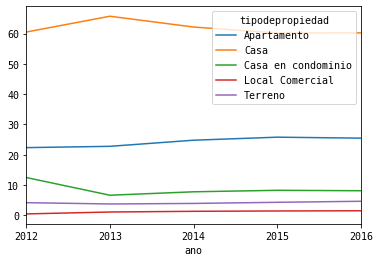

In [105]:
por_tipo_ano_porcentual.plot(kind='line', xticks=por_tipo_ano_porcentual.index.values)

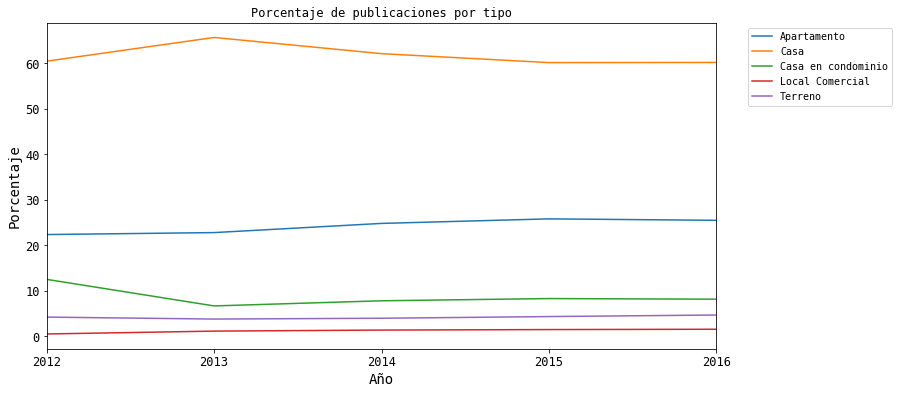

In [197]:
import matplotlib.pyplot as plt
def get_lineplot(data, xlabel="", ylabel="", **kwargs):
    plot = data.plot(figsize=(12,6), fontsize=12, **kwargs)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    return plot
plot = get_lineplot(por_tipo_ano_porcentual, xticks=por_tipo_ano_porcentual.index.values, title = "Porcentaje de publicaciones por tipo", xlabel="Año", ylabel="Porcentaje")
